Computing distributions of sentences given to minors compared to adults

### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing datasets

In [5]:
data_types = {
    "ID": str,
    "ST_IMPOSED_YR": str,
}

In [6]:
minors = pd.read_csv("data/obts/minors_analysissentences.csv", dtype = data_types)
adults = pd.read_csv("data/obts/adults_analysissentences.csv", dtype = data_types)

### filters for felonies
minors = minors[minors["CT_CHARGE_LEVEL"] == "F"].reset_index(drop = True)
adults = adults[adults["CT_CHARGE_LEVEL"] == "F"].reset_index(drop = True)

### removes juvenile sanctions
minors = minors[minors["CT_ACTION_TAKEN"] != "K"].reset_index(drop = True)
adults = adults[adults["CT_ACTION_TAKEN"] != "K"].reset_index(drop = True)

### removes sentences with no confinement
minors = minors[minors["ST_DAYS"] != 0].reset_index(drop = True)
adults = adults[adults["ST_DAYS"] != 0].reset_index(drop = True)

### converts sentences into years
minors["ST_YEARS"] = round(minors["ST_DAYS"]/365, 3)
adults["ST_YEARS"] = round(adults["ST_DAYS"]/365, 3)

C:\Users\sdasgupta\AppData\Local\Temp\ipykernel_11312\3965487456.py:1: DtypeWarning: Columns (2,23,24,27,29,34,35,50) have mixed types. Specify dtype option on import or set low_memory=False.
  minors = pd.read_csv("data/obts/minors_analysissentences.csv", dtype = data_types)
C:\Users\sdasgupta\AppData\Local\Temp\ipykernel_11312\3965487456.py:2: DtypeWarning: Columns (2,23,24,26,27,29,34,35,38,40,41,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  adults = pd.read_csv("data/obts/adults_analysissentences.csv", dtype = data_types)


### Analyzing

#### All felonies (excluding, life, capital and punishable by life)

In [9]:
dfm = minors[minors["CT_CHARGE_DEGREE"].isin(["F", "S", "T"])].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"].isin(["F", "S", "T"])].reset_index(drop = True)

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

,MINORS,ADULTS
mean,4.5,3.2
std,20.2,24.8
min,0.0,0.0
25%,1.0,0.5
50%,3.0,1.1
75%,5.0,3.0
80%,5.0,4.0
95%,12.9,10.0
99.5%,30.0,30.0
max,964.5,999.5


Minor sentences of 6 years: 1315 or 0.0 %
Adult sentences of 6 years: 11074 or 0.0 %
Minor sentences of 7+ years: 5282 or 0.1 %
Adult sentences of 7+ years: 140726 or 0.1 %


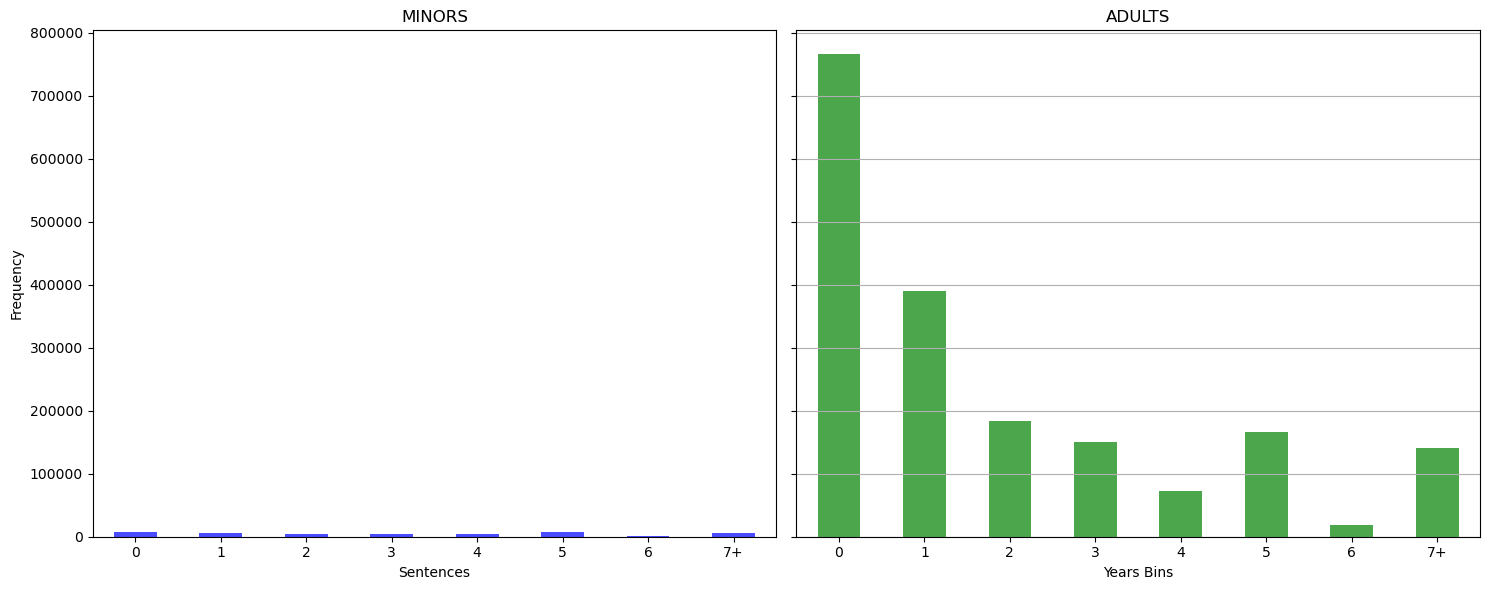

In [10]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

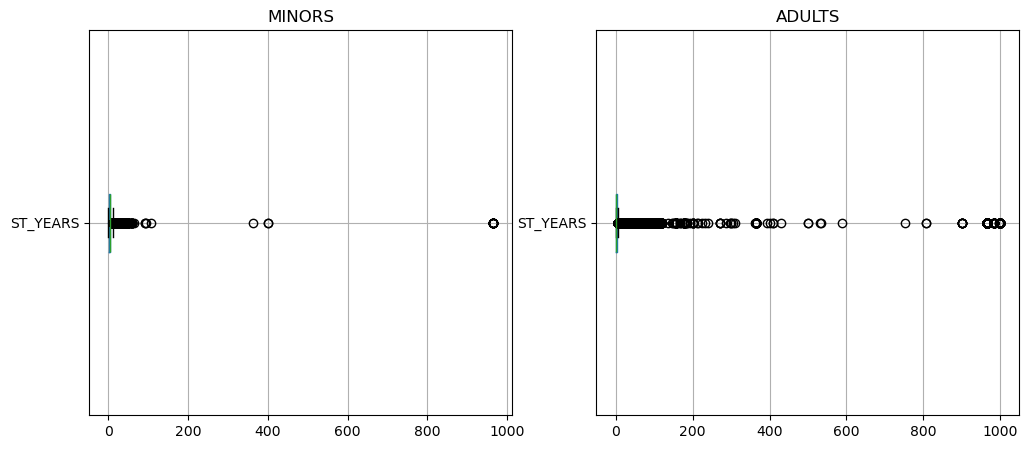

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

##### Plotting for values below the 80th percentile

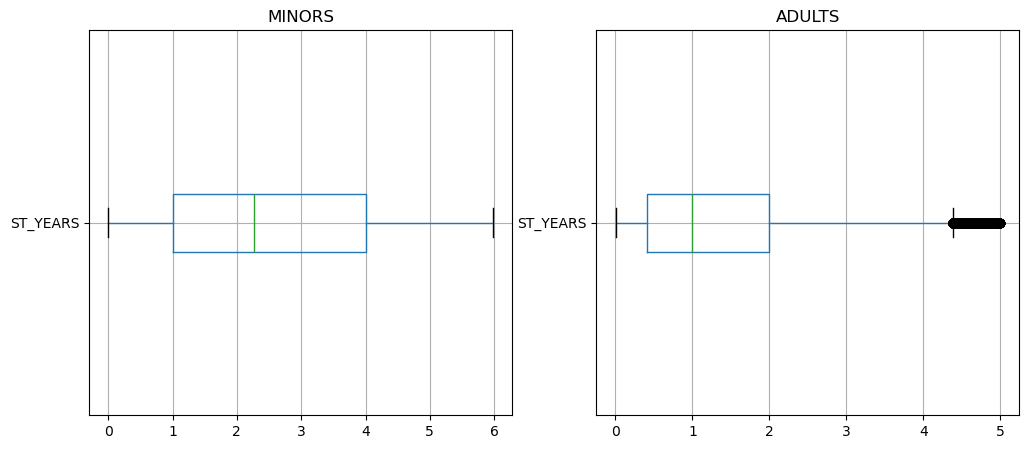

In [13]:
dfm = dfm[dfm["ST_YEARS"] < 6].reset_index(drop = True)
dfa = dfa[dfa["ST_YEARS"] < 5].reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

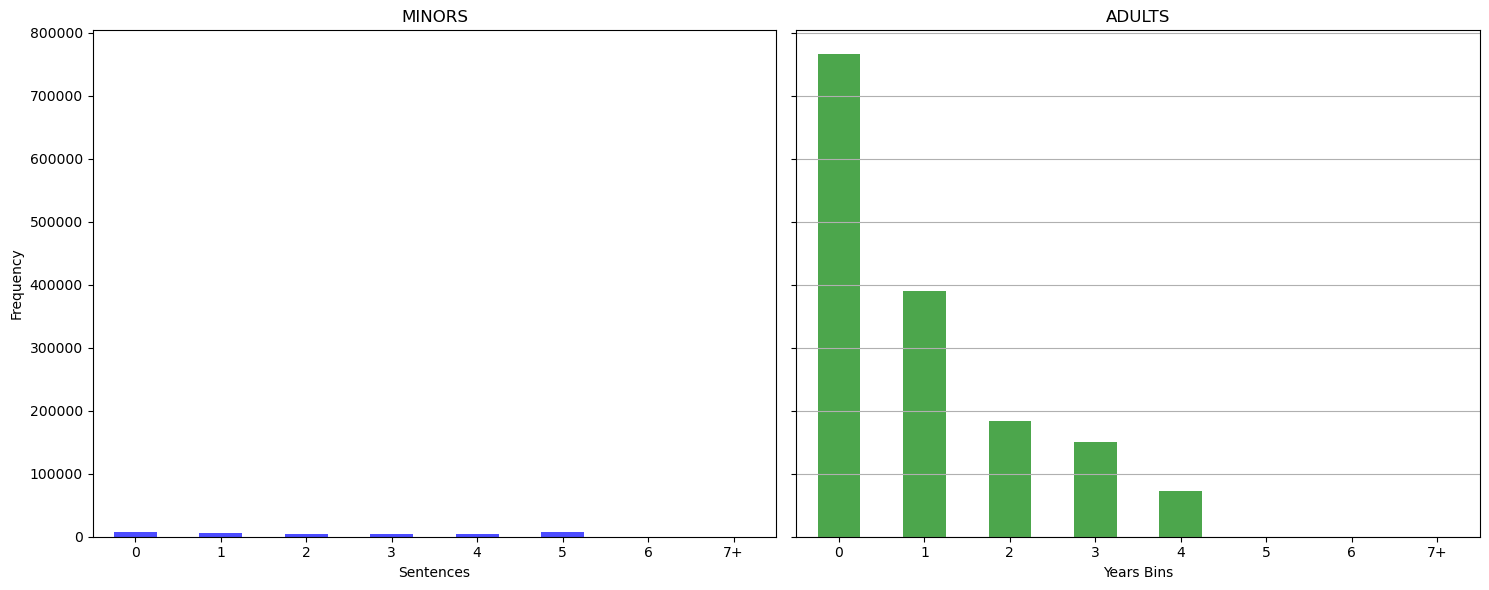

In [14]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']


dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Adjusting for extreme sentences

In [16]:
dfm = minors[minors["CT_CHARGE_DEGREE"].isin(["F", "S", "T"])].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"].isin(["F", "S", "T"])].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.90)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.90)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 10.0 %
Share of adult charges above the percentile: 9.0 %


,MINORS,ADULTS
mean,3.5,1.9
std,2.6,1.7
min,0.0,0.0
25%,1.0,0.5
50%,3.0,1.1
75%,5.0,3.0
80%,5.0,4.0
95%,9.0,5.0
99.5%,9.0,5.0
max,9.0,5.0


Minor sentences of 6 years: 1315 or 0.0 %
Adult sentences of 6 years: 0 or 0.0 %
Minor sentences of 7+ years: 5282 or 0.1 %
Adult sentences of 7+ years: 0 or 0.0 %


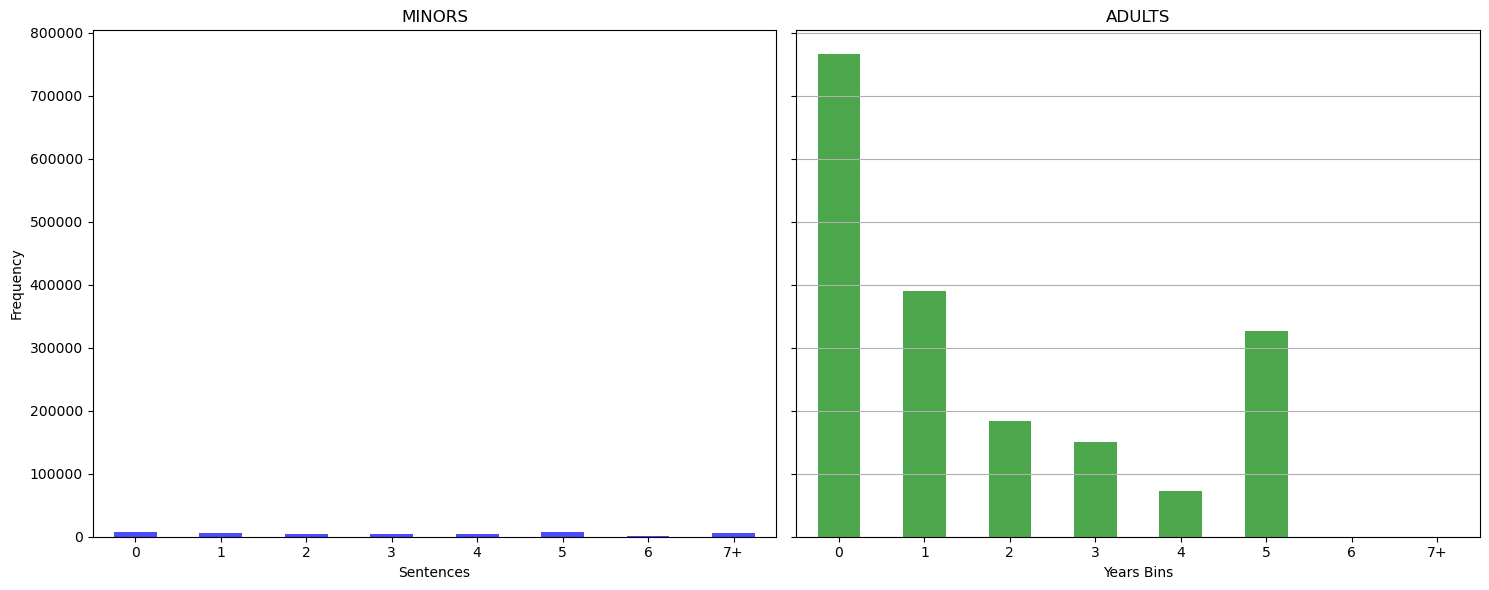

In [17]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
dfm = minors[minors["CT_CHARGE_DEGREE"].isin(["F", "S", "T"])].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"].isin(["F", "S", "T"])].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.85)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.85)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 13.6 %
Share of adult charges above the percentile: 9.0 %


,MINORS,ADULTS
mean,3.2,1.9
std,2.0,1.7
min,0.0,0.0
25%,1.0,0.5
50%,3.0,1.1
75%,5.0,3.0
80%,5.0,4.0
95%,6.0,5.0
99.5%,6.0,5.0
max,6.0,5.0


#### First-degree felonies

In [20]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "F"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "F"].reset_index(drop = True)

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

,MINORS,ADULTS
mean,10.0,10.6
std,39.5,46.1
min,0.0,0.0
25%,3.0,3.0
50%,6.0,5.0
75%,10.0,10.0
80%,12.5,13.0
95%,25.0,30.0
99.5%,50.0,95.0
max,964.5,999.5


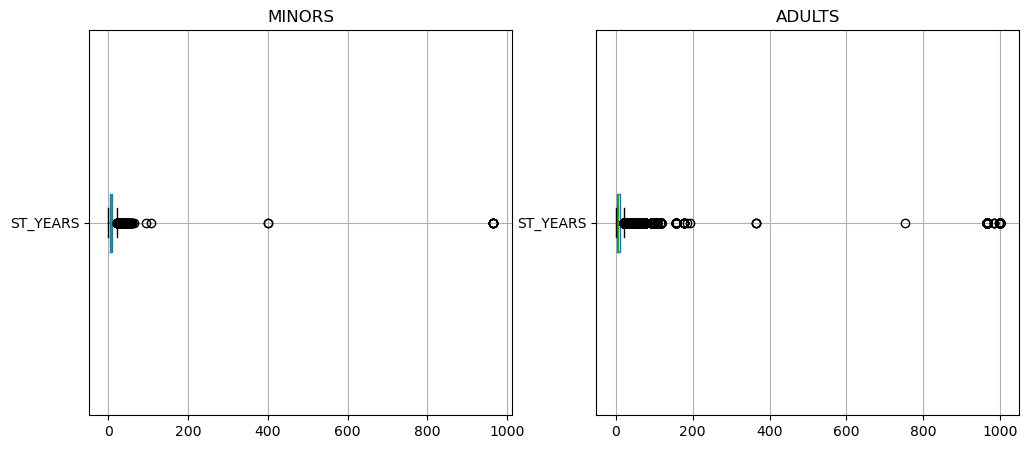

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

Minor sentences of 6 years: 438 or 0.1 %
Adult sentences of 6 years: 2492 or 0.0 %
Minor sentences of 7+ years: 2175 or 0.4 %
Adult sentences of 7+ years: 38240 or 0.4 %


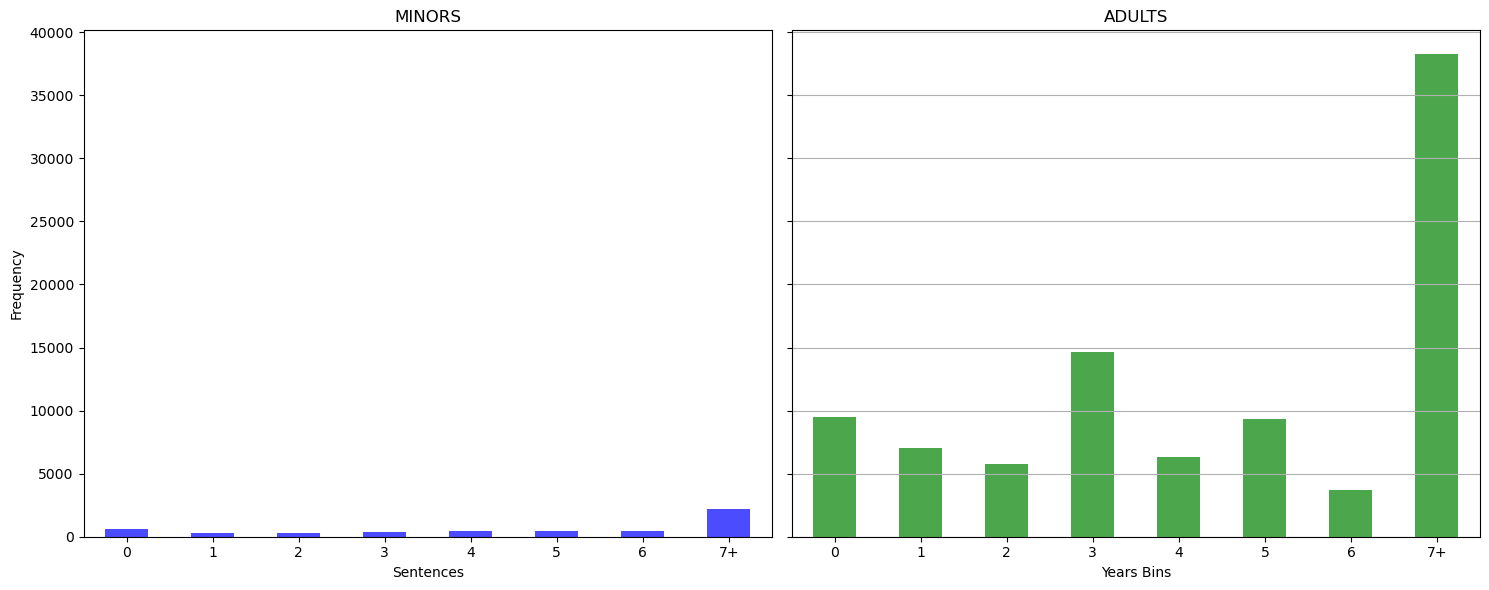

In [22]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Plotting for values below the 80th percentile

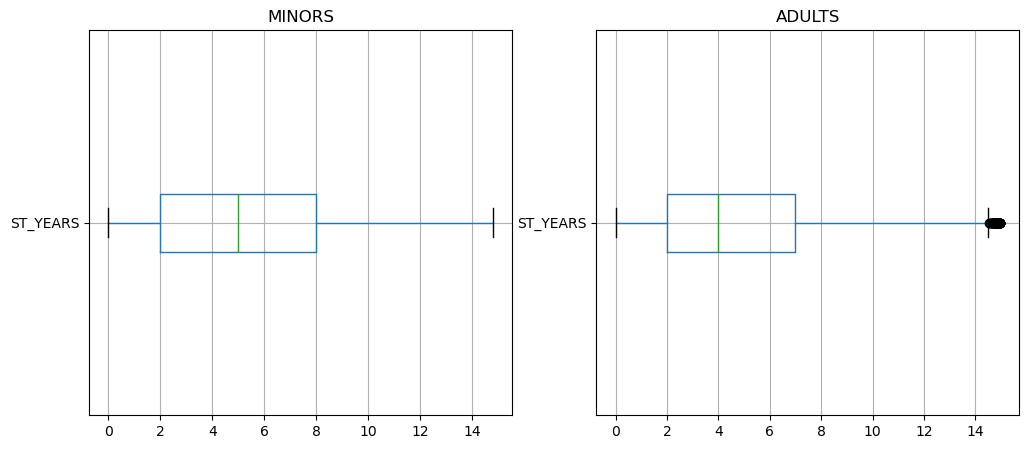

In [24]:
dfm = dfm[dfm["ST_YEARS"] < 15].reset_index(drop = True)
dfa = dfa[dfa["ST_YEARS"] < 15].reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

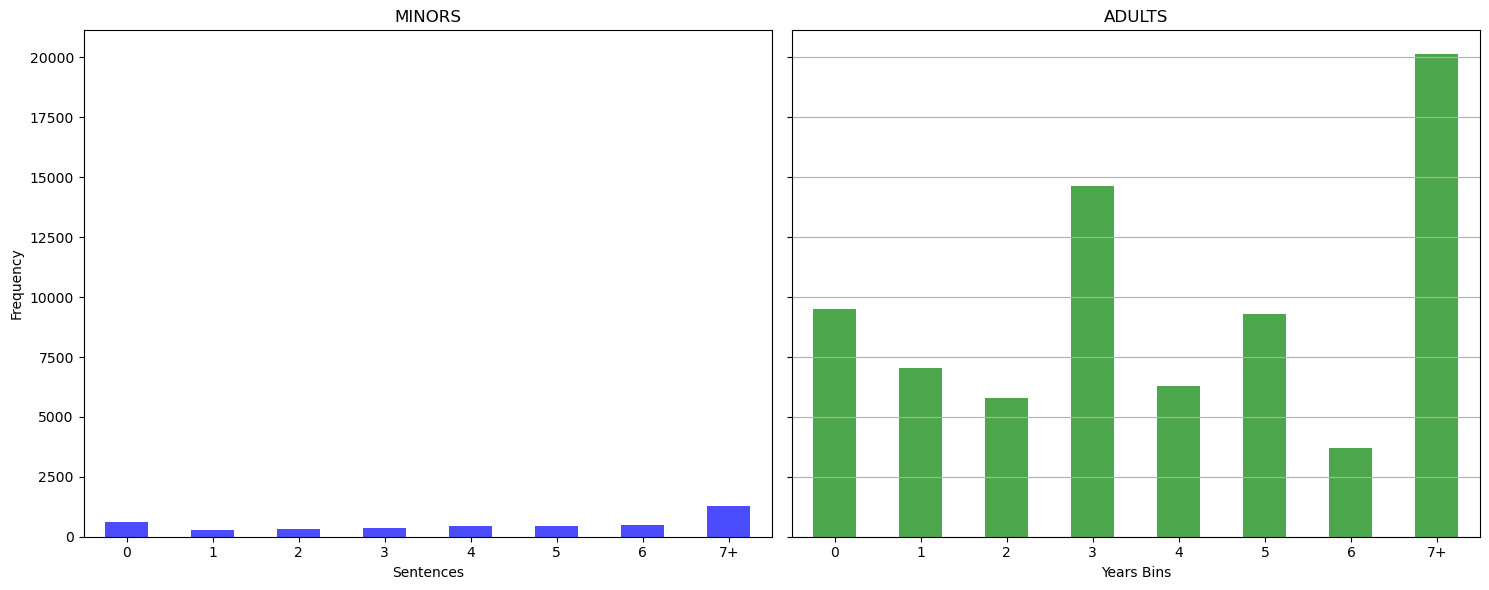

In [25]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']


dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Adjusting for extreme sentences

In [27]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "F"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "F"].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.90)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.90)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 7.8 %
Share of adult charges above the percentile: 8.6 %


,MINORS,ADULTS
mean,7.6,7.3
std,6.0,6.2
min,0.0,0.0
25%,3.0,3.0
50%,6.0,5.0
75%,10.0,10.0
80%,12.5,13.0
95%,20.0,20.0
99.5%,20.0,20.0
max,20.0,20.0


Minor sentences of 6 years: 438 or 0.1 %
Adult sentences of 6 years: 2492 or 0.0 %
Minor sentences of 7+ years: 2175 or 0.4 %
Adult sentences of 7+ years: 38240 or 0.4 %


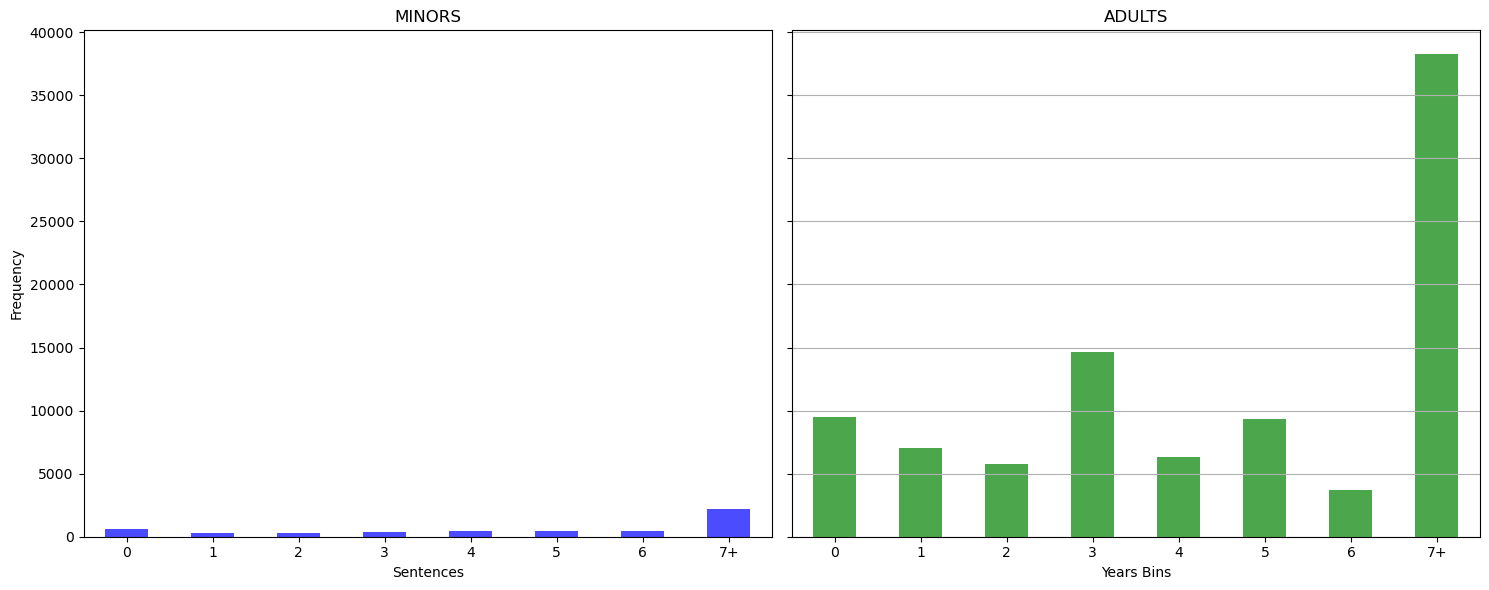

In [28]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "F"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "F"].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.85)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.85)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 12.1 %
Share of adult charges above the percentile: 13.3 %


,MINORS,ADULTS
mean,7.0,6.7
std,5.0,5.0
min,0.0,0.0
25%,3.0,3.0
50%,6.0,5.0
75%,10.0,10.0
80%,12.5,13.0
95%,15.0,15.0
99.5%,15.0,15.0
max,15.0,15.0


#### Second-degree felonies

In [31]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "S"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "S"].reset_index(drop = True)

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

,MINORS,ADULTS
mean,5.1,5.5
std,18.9,31.6
min,0.0,0.0
25%,1.3,1.0
50%,3.3,2.5
75%,6.0,5.0
80%,7.4,7.0
95%,15.0,15.0
99.5%,23.9,44.4
max,964.5,999.5


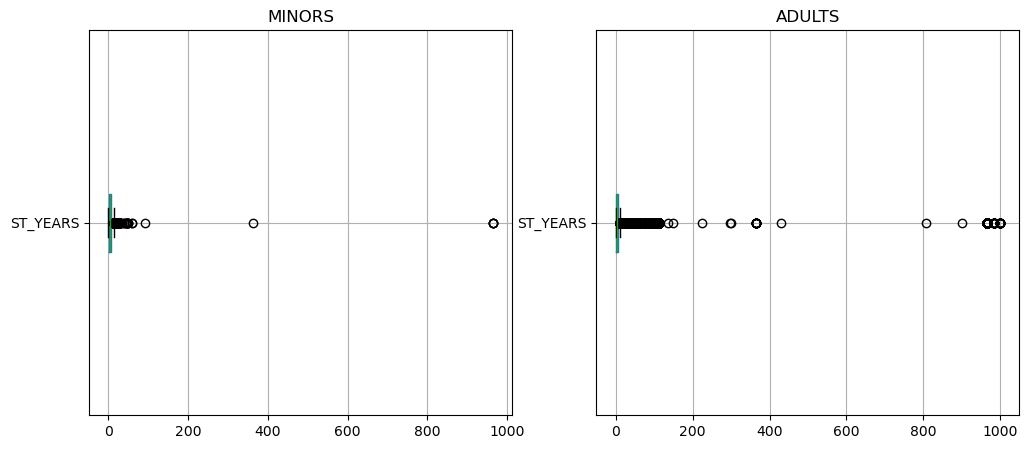

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

Minor sentences of 6 years: 636 or 0.1 %
Adult sentences of 6 years: 6590 or 0.0 %
Minor sentences of 7+ years: 2510 or 0.2 %
Adult sentences of 7+ years: 83351 or 0.2 %


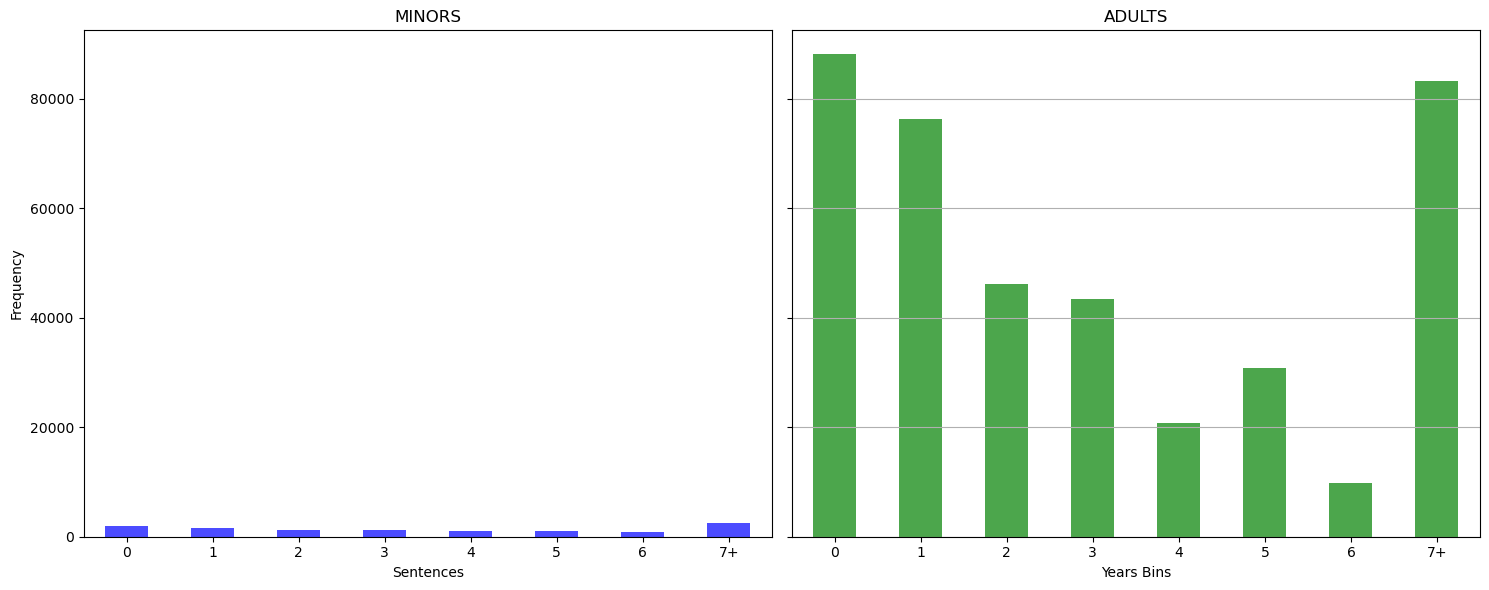

In [33]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Plotting for values below the 80th percentile

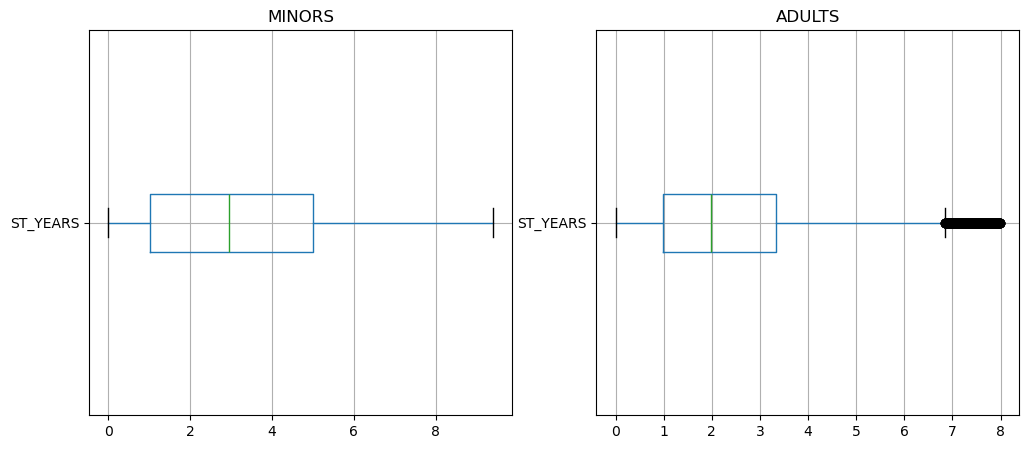

In [35]:
dfm = dfm[dfm["ST_YEARS"] < 9.4].reset_index(drop = True)
dfa = dfa[dfa["ST_YEARS"] < 8].reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

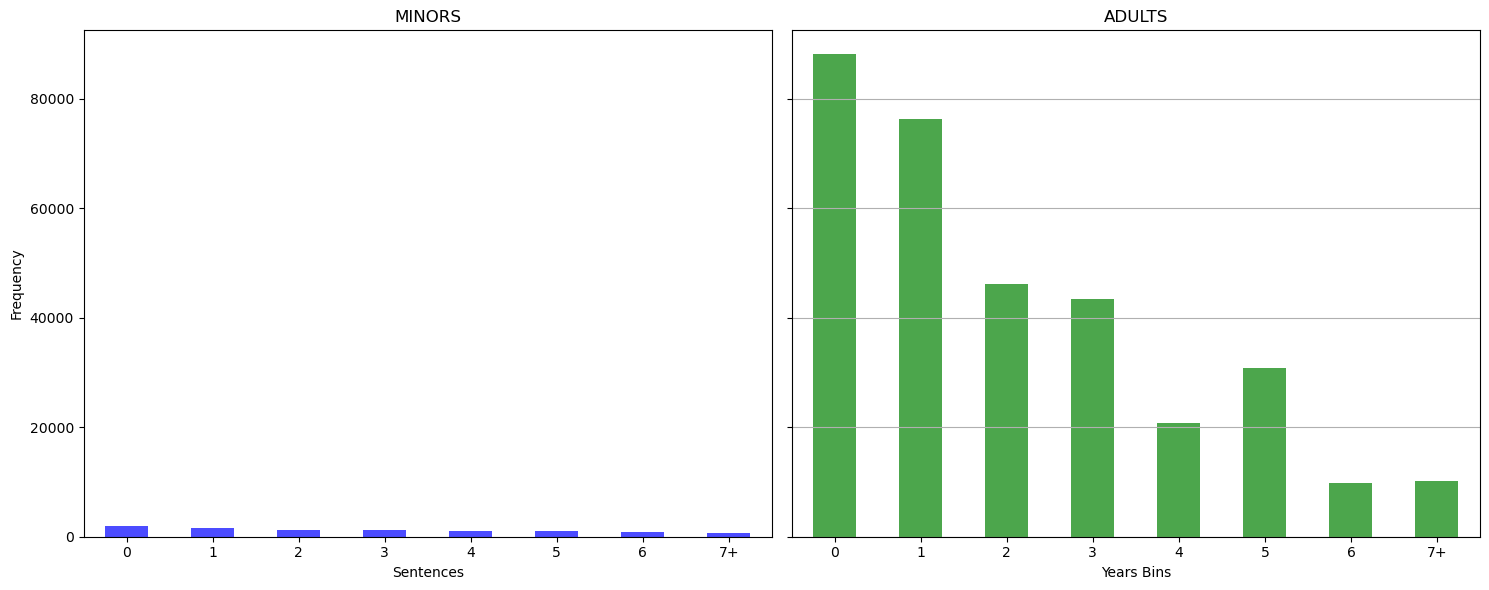

In [36]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']


dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Adjusting for extreme sentences

In [38]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "S"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "S"].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.90)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.90)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 9.9 %
Share of adult charges above the percentile: 10.0 %


,MINORS,ADULTS
mean,4.3,3.800
std,3.5,3.500
min,0.0,0.000
25%,1.3,1.000
50%,3.3,2.500
75%,6.0,5.000
80%,7.4,7.000
95%,11.0,10.800
99.5%,11.0,10.800
max,11.0,10.800


Minor sentences of 6 years: 636 or 0.1 %
Adult sentences of 6 years: 6590 or 0.0 %
Minor sentences of 7+ years: 2510 or 0.2 %
Adult sentences of 7+ years: 83351 or 0.2 %


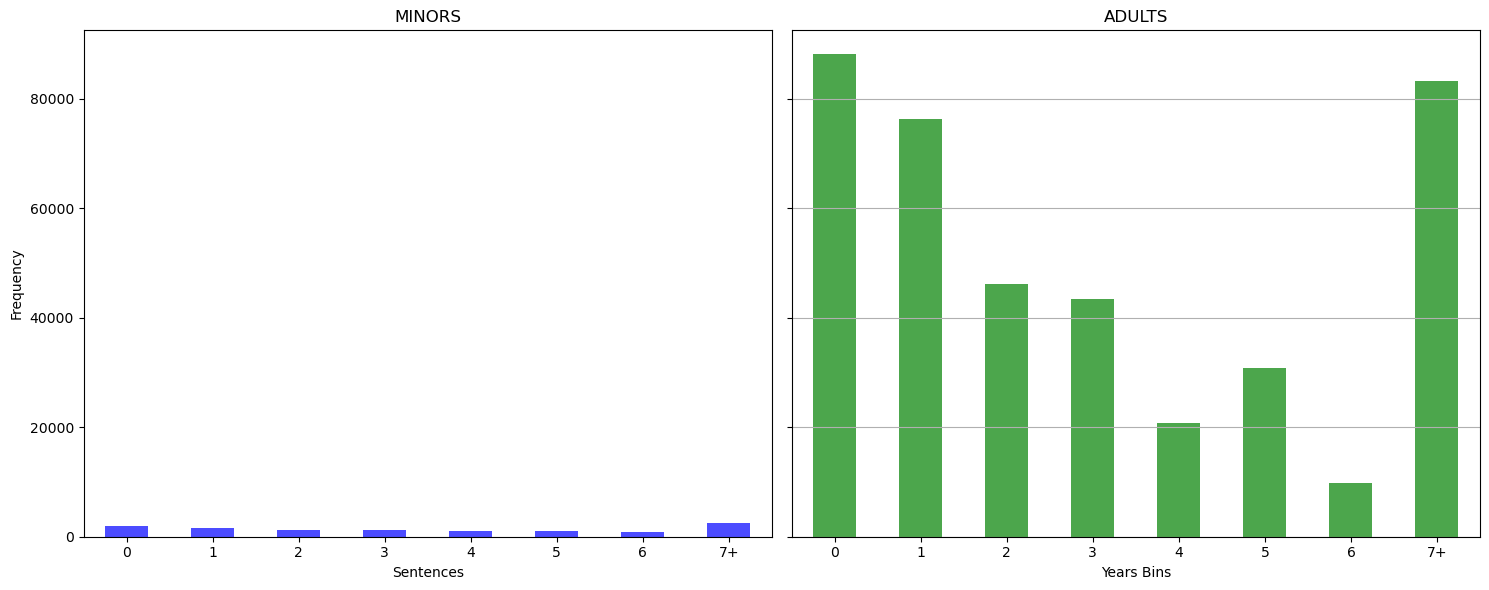

In [39]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [40]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "S"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "S"].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.85)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.85)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 10.4 %
Share of adult charges above the percentile: 14.6 %


,MINORS,ADULTS
mean,4.2,3.5
std,3.3,3.0
min,0.0,0.0
25%,1.3,1.0
50%,3.3,2.5
75%,6.0,5.0
80%,7.4,7.0
95%,10.0,9.0
99.5%,10.0,9.0
max,10.0,9.0


#### Third-degree felonies

In [42]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "T"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "T"].reset_index(drop = True)

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

,MINORS,ADULTS
mean,3.1,2.1
std,13.8,19.8
min,0.0,0.0
25%,1.0,0.4
50%,2.5,1.0
75%,5.0,2.2
80%,5.0,3.0
95%,5.1,5.0
99.5%,15.0,10.0
max,964.5,999.2


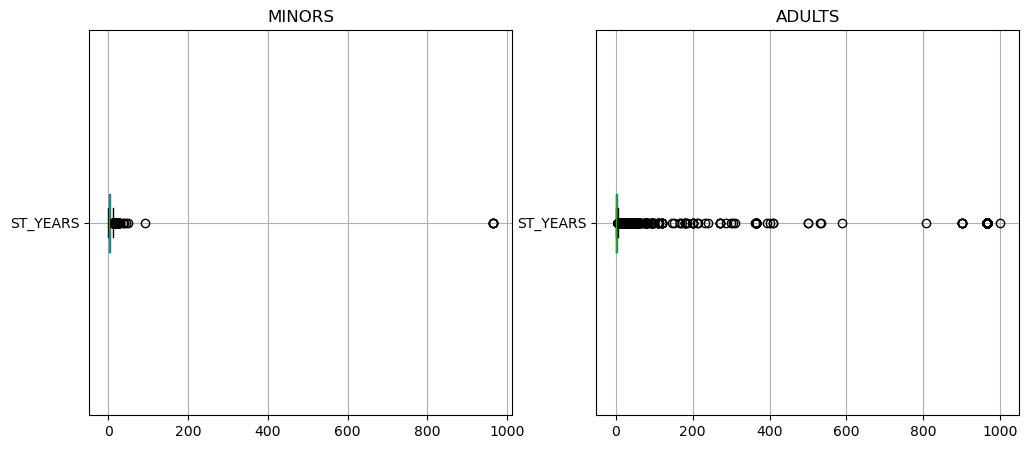

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

Minor sentences of 6 years: 241 or 0.0 %
Adult sentences of 6 years: 1992 or 0.0 %
Minor sentences of 7+ years: 597 or 0.0 %
Adult sentences of 7+ years: 19135 or 0.0 %


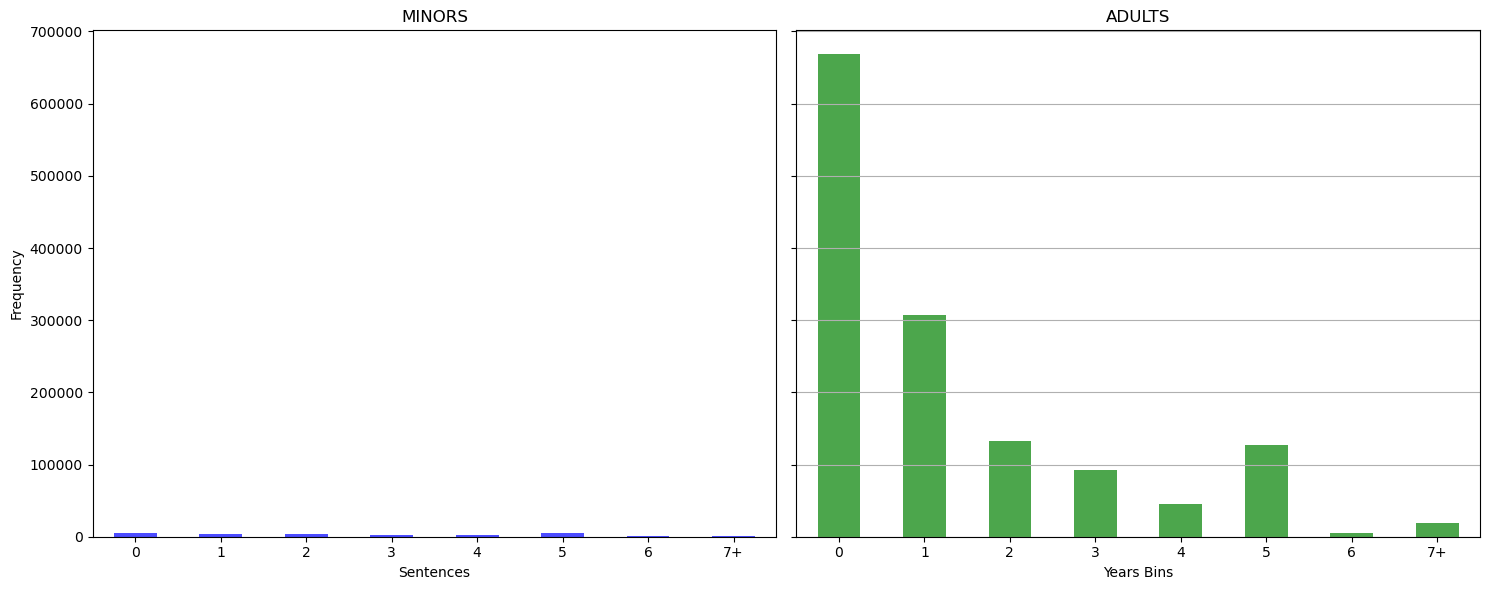

In [44]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Plotting for values below the 80th percentile

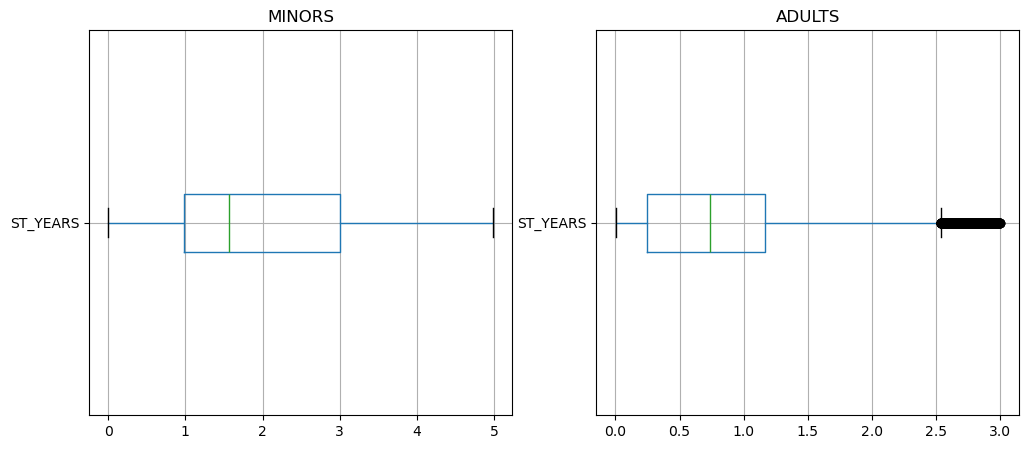

In [46]:
dfm = dfm[dfm["ST_YEARS"] < 5].reset_index(drop = True)
dfa = dfa[dfa["ST_YEARS"] < 3].reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

dfm.boxplot(column = "ST_YEARS", ax = axes[0], vert = False)
axes[0].set_title("MINORS")
dfa.boxplot(column = "ST_YEARS", ax = axes[1], vert = False)
axes[1].set_title("ADULTS")

plt.show()

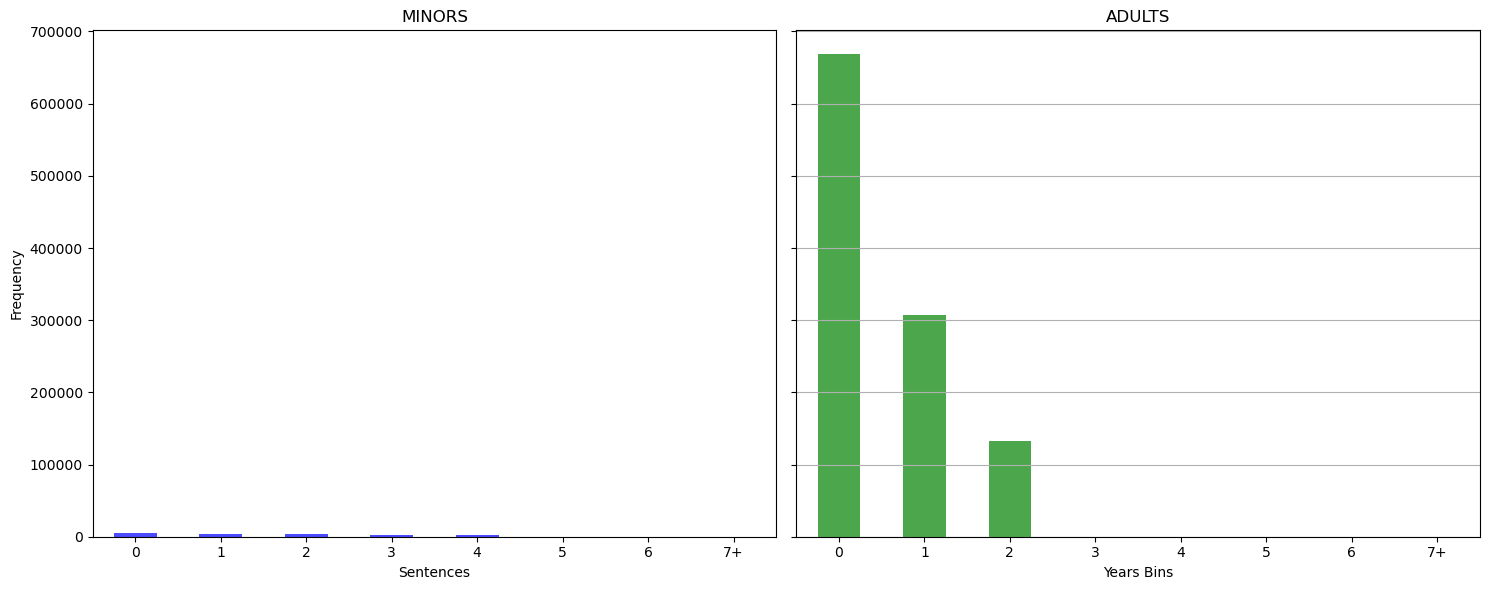

In [47]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']


dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Adjusting for extreme sentences

In [49]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "T"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "T"].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.90)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.90)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 5.2 %
Share of adult charges above the percentile: 2.1 %


,MINORS,ADULTS
mean,2.7,1.6
std,1.8,1.6
min,0.0,0.0
25%,1.0,0.4
50%,2.5,1.0
75%,5.0,2.2
80%,5.0,3.0
95%,5.0,5.0
99.5%,5.0,5.0
max,5.0,5.0


Minor sentences of 6 years: 0 or 0.0 %
Adult sentences of 6 years: 0 or 0.0 %
Minor sentences of 7+ years: 0 or 0.0 %
Adult sentences of 7+ years: 0 or 0.0 %


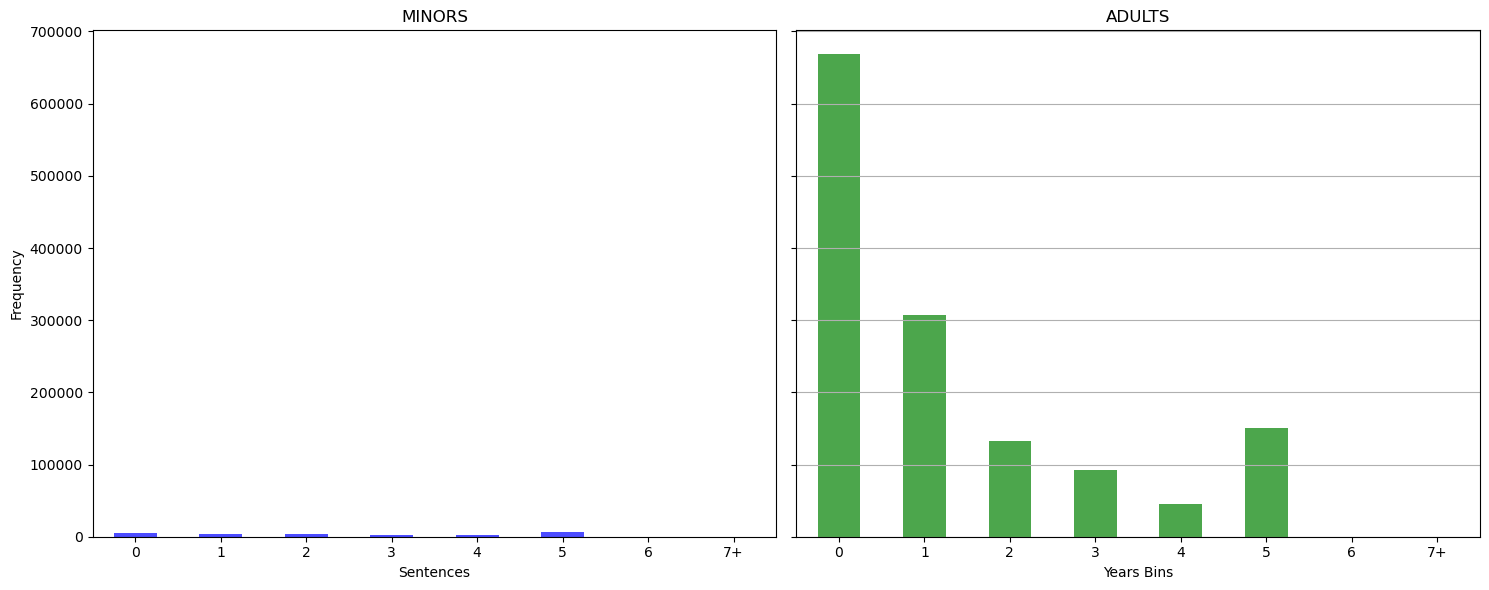

In [50]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ['0', '1', '2', '3', '4', '5', '6', '7+']

dfm["BINNED"] = pd.cut(dfm["ST_YEARS"], bins = bins, right = False)
dfa["BINNED"] = pd.cut(dfa["ST_YEARS"], bins = bins, right = False)
print("Minor sentences of 6 years:", len(dfm[dfm["ST_YEARS"] == 6]), "or", round(len(dfm[dfm["ST_YEARS"] == 6])/len(dfm), 1), "%")
print("Adult sentences of 6 years:", len(dfa[dfa["ST_YEARS"] == 6]), "or", round(len(dfa[dfa["ST_YEARS"] == 6])/len(dfa), 1), "%")
print("Minor sentences of 7+ years:", len(dfm[dfm["ST_YEARS"] >= 7]), "or", round(len(dfm[dfm["ST_YEARS"] >= 7])/len(dfm), 1), "%")
print("Adult sentences of 7+ years:", len(dfa[dfa["ST_YEARS"] >= 7]), "or", round(len(dfa[dfa["ST_YEARS"] >= 7])/len(dfa), 1), "%")                       

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

dfm["BINNED"].value_counts(sort = False).plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('MINORS')
axes[0].set_xlabel('Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(labels, rotation=0)

dfa["BINNED"].value_counts(sort=False).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('ADULTS')
axes[1].set_xlabel('Years Bins')
axes[1].set_xticklabels(labels, rotation=0)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [51]:
dfm = minors[minors["CT_CHARGE_DEGREE"] == "T"].reset_index(drop = True)
dfa = adults[adults["CT_CHARGE_DEGREE"] == "T"].reset_index(drop = True)

percentile = dfm["ST_YEARS"].quantile(0.85)
share = round(len(dfm[dfm["ST_YEARS"] > percentile]) / len(dfm) * 100, 1)
print("Share of minor charges above the percentile:", share, "%")
dfm["ST_YEARS"] = dfm["ST_YEARS"].apply(lambda x: min(x, percentile))

percentile = dfa["ST_YEARS"].quantile(0.85)
share = round(len(dfa[dfa["ST_YEARS"] > percentile]) / len(dfa) * 100, 1)
print("Share of adult charges above the percentile:", share, "%")
dfa["ST_YEARS"] = dfa["ST_YEARS"].apply(lambda x: min(x, percentile))

summary_m = dfm["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_m.loc["mode"] = dfm["ST_YEARS"].mode().iloc[0]
summary_a = dfa["ST_YEARS"].describe(percentiles = [0.25, 0.75, 0.8, 0.95, 0.995]).round(1)
summary_a.loc["mode"] = dfa["ST_YEARS"].mode().iloc[0]
summary = pd.concat([summary_m, summary_a], axis=1)
summary = summary.drop(index = "count")
summary.columns = ["MINORS", "ADULTS"]

summary

Share of minor charges above the percentile: 5.2 %
Share of adult charges above the percentile: 14.8 %


,MINORS,ADULTS
mean,2.7,1.400
std,1.8,1.200
min,0.0,0.000
25%,1.0,0.400
50%,2.5,1.000
75%,5.0,2.200
80%,5.0,3.000
95%,5.0,3.500
99.5%,5.0,3.500
max,5.0,3.500
